import libraries

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
from datetime import datetime, timedelta
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
warnings.filterwarnings('ignore')
# Set plotting styles
plt.style.use('ggplot')
sns.set_style('whitegrid')

load and prepare the data

In [45]:
# Load the dataset
url = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/vaccinations.csv"
df = pd.read_csv(url)
# Display basic information
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
display(df.head())
print("\nData types:")
display(df.dtypes)
print("\nSummary statistics:")
display(df.describe())
# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])
# Create a list of major countries for analysis
major_countries = ['United States', 'United Kingdom', 'Germany', 'France', 'Israel', 
                   'Canada', 'Brazil', 'India', 'Japan']
# Filter out OWID special entities (continents, etc.)
df_countries = df[~df['iso_code'].str.startswith('OWID_', na=False)]
# Check data availability for selected countries
print("\nData availability for selected countries:")
for country in major_countries:
    country_data = df[df['location'] == country]
    if len(country_data) > 0:
        print(f"{country}: {country_data['date'].min()} to {country_data['date'].max()}, {len(country_data)} records")
    else:
        print(f"{country}: No data available")


Dataset shape: (196246, 16)

First few rows:


,location,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,NaN,33.0,1367.0,0.003



Data types:


location                                object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
total_boosters                         float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
total_boosters_per_hundred             float64
daily_vaccinations_per_million         float64
daily_people_vaccinated                float64
daily_people_vaccinated_per_hundred    float64
dtype: object


Summary statistics:


,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,daily_vaccinations_per_million,daily_people_vaccinated,daily_people_vaccinated_per_hundred
count,8.541700e+04,8.113200e+04,7.806100e+04,5.360000e+04,7.097100e+04,1.950290e+05,85417.000000,81132.000000,78061.000000,53600.000000,195029.000000,1.921770e+05,192177.000000
mean,5.616980e+08,2.487064e+08,2.286639e+08,1.505811e+08,7.398640e+05,2.838758e+05,124.279558,53.501409,48.680182,36.301489,1851.477596,1.060707e+05,0.074980
std,1.842160e+09,8.006461e+08,7.403763e+08,4.360697e+08,3.183064e+06,1.922352e+06,85.098042,29.379655,29.042282,30.218208,3117.828731,7.866884e+05,0.176216
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.970788e+06,1.050009e+06,9.644000e+05,6.022820e+05,2.010000e+03,2.790000e+02,44.770000,27.880000,21.220000,5.920000,106.000000,4.300000e+01,0.001000
50%,1.439435e+07,6.901088e+06,6.191345e+06,5.765440e+06,2.053100e+04,3.871000e+03,130.550000,64.300000,57.920000,35.905000,605.000000,7.710000e+02,0.014000
75%,1.161972e+08,5.093295e+07,4.773185e+07,4.019072e+07,1.736115e+05,3.180300e+04,194.990000,77.780000,73.610000,57.620000,2402.000000,9.307000e+03,0.073000
max,1.357877e+10,5.631264e+09,5.177943e+09,2.817381e+09,4.967320e+07,4.369181e+07,410.230000,129.070000,126.890000,150.470000,117113.000000,2.107127e+07,11.711000



Missing values per column:


location                                    0
iso_code                                    0
date                                        0
total_vaccinations                     110829
people_vaccinated                      115114
people_fully_vaccinated                118185
total_boosters                         142646
daily_vaccinations_raw                 125275
daily_vaccinations                       1217
total_vaccinations_per_hundred         110829
people_vaccinated_per_hundred          115114
people_fully_vaccinated_per_hundred    118185
total_boosters_per_hundred             142646
daily_vaccinations_per_million           1217
daily_people_vaccinated                  4069
daily_people_vaccinated_per_hundred      4069
dtype: int64


Data availability for selected countries:
United States: 2020-12-13 00:00:00 to 2023-05-09 00:00:00, 878 records
United Kingdom: 2021-01-10 00:00:00 to 2022-09-11 00:00:00, 610 records
Germany: 2020-12-27 00:00:00 to 2023-04-07 00:00:00, 832 records
France: 2020-12-27 00:00:00 to 2023-07-10 00:00:00, 926 records
Israel: 2020-12-19 00:00:00 to 2023-05-04 00:00:00, 867 records
Canada: 2020-12-14 00:00:00 to 2024-07-24 00:00:00, 1319 records
Brazil: 2021-01-17 00:00:00 to 2023-03-22 00:00:00, 795 records
India: 2021-01-15 00:00:00 to 2024-08-12 00:00:00, 1306 records
Japan: 2021-02-17 00:00:00 to 2023-05-07 00:00:00, 810 records


EDA below

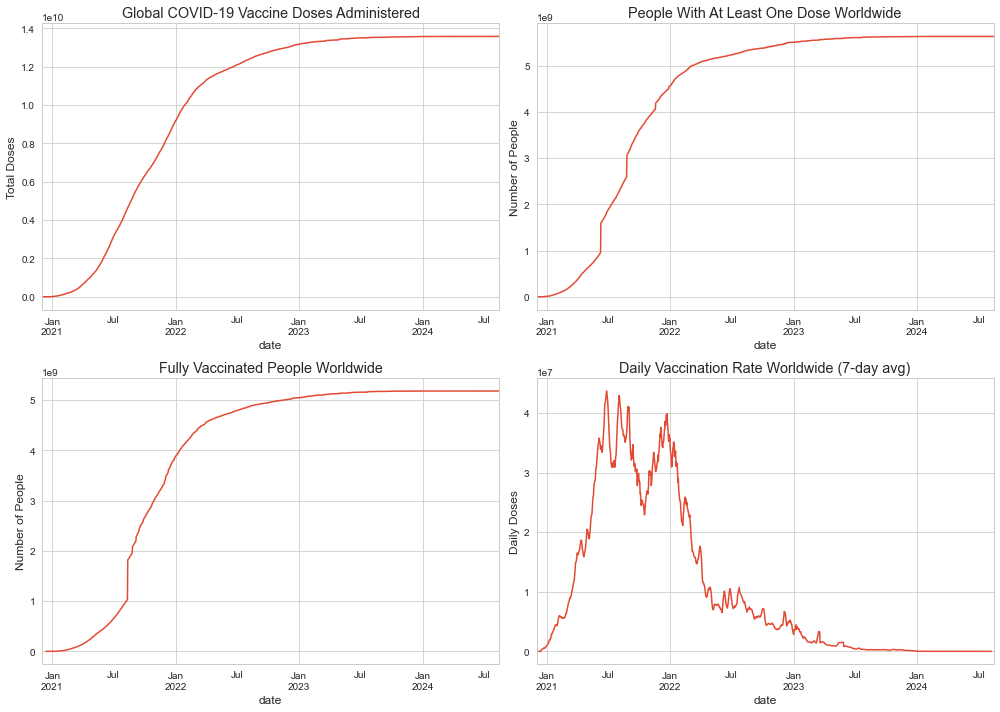

In [46]:

# Get world data
world_data = df[df['location'] == 'World'].copy()
world_data.set_index('date', inplace=True)
world_data.sort_index(inplace=True)
# Plot global vaccination metrics over time
fig = plt.figure(figsize=(14, 10))
# Plot 1: Total vaccinations worldwide
ax1 = plt.subplot(2, 2, 1)
world_data['total_vaccinations'].plot(ax=ax1)
ax1.set_title('Global COVID-19 Vaccine Doses Administered')
ax1.set_ylabel('Total Doses')
ax1.grid(True)
# Plot 2: People vaccinated worldwide
ax2 = plt.subplot(2, 2, 2)
world_data['people_vaccinated'].plot(ax=ax2)
ax2.set_title('People With At Least One Dose Worldwide')
ax2.set_ylabel('Number of People')
ax2.grid(True)
# Plot 3: People fully vaccinated worldwide
ax3 = plt.subplot(2, 2, 3)
world_data['people_fully_vaccinated'].plot(ax=ax3)
ax3.set_title('Fully Vaccinated People Worldwide')
ax3.set_ylabel('Number of People')
ax3.grid(True)
# Plot 4: Daily vaccinations worldwide (7-day avg)
ax4 = plt.subplot(2, 2, 4)
world_data['daily_vaccinations'].plot(ax=ax4)
ax4.set_title('Daily Vaccination Rate Worldwide (7-day avg)')
ax4.set_ylabel('Daily Doses')
ax4.grid(True)
plt.tight_layout()
plt.show()
# Create a dataframe with the latest vaccination metrics by country
latest_by_country = df.sort_values('date').groupby('location').tail(1)
latest_by_country = latest_by_country.sort_values('people_fully_vaccinated_per_hundred', ascending=False)
# Filter out locations with population < 1 million and remove OWID special entities
pop_threshold = 1000000
filtered_countries = latest_by_country[
    ~latest_by_country['iso_code'].str.startswith('OWID_', na=False) &
    (latest_by_country['people_fully_vaccinated'].notna())
].head(20)
# Create interactive bar chart of vaccination rates by country
fig = px.bar(
    filtered_countries,
    x='location',
    y=['people_fully_vaccinated_per_hundred', 'people_vaccinated_per_hundred'],
    title='COVID-19 Vaccination Rates by Country (Top 20)',
    labels={
        'location': 'Country',
        'value': 'Percentage of Population',
        'variable': 'Vaccination Status'
    },
    color_discrete_map={
        'people_vaccinated_per_hundred': 'lightblue',
        'people_fully_vaccinated_per_hundred': 'darkblue'
    },
    barmode='group'
)
fig.update_layout(
    xaxis_tickangle=-45,
    legend_title_text='',
    height=600
)
fig.show()


Performing detailed time series analysis for United States
Data points available for analysis: 878


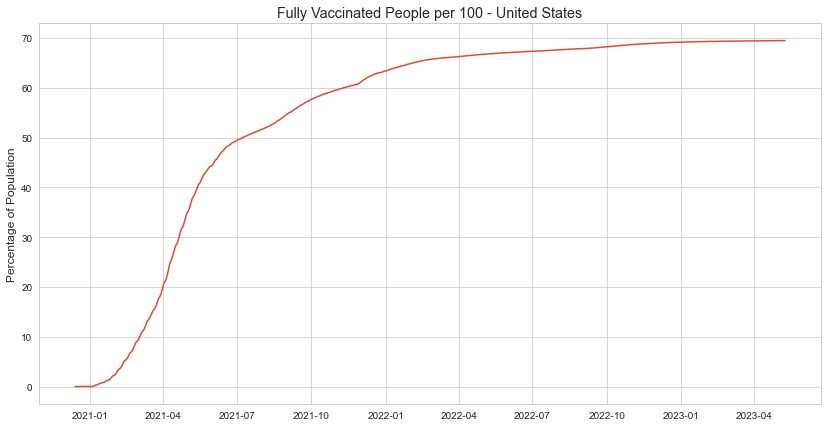

Results of Dickey-Fuller Test:
Test Statistic                  -5.080557
p-value                          0.000015
Lags Used                       21.000000
Number of Observations Used    856.000000
Critical Value (1%)             -3.438012
Critical Value (5%)             -2.864922
Critical Value (10%)            -2.568571
dtype: float64
Conclusion: Time series is stationary


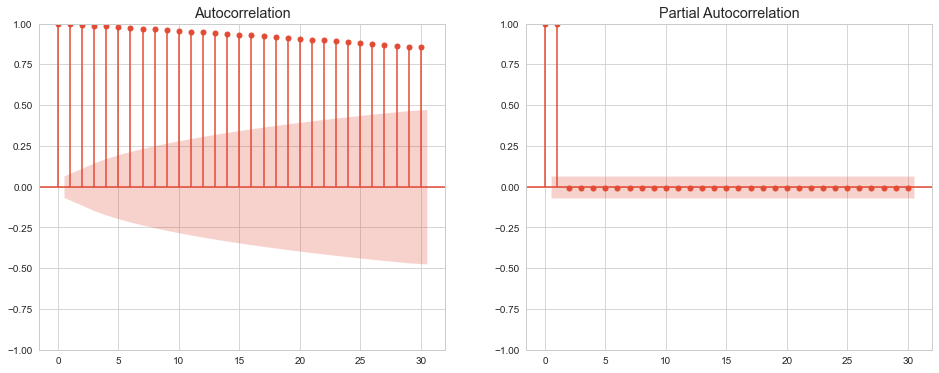


Fitting ARIMA(1,0,1) model for United States...


In [48]:
# Select a target country for detailed forecasting
target_country = 'United States'  # Can be changed to any country of interest
print(f"\nPerforming detailed time series analysis for {target_country}")
# Get data for target country
country_data = df[df['location'] == target_country].copy()
country_data.set_index('date', inplace=True)
country_data.sort_index(inplace=True)
# Fill missing values using forward fill for time series data
country_data = country_data.fillna(method='ffill')
# Select the target variable for forecasting
target_var = 'people_fully_vaccinated_per_hundred'
ts_data = country_data[target_var].dropna()
# Check if we have enough data
if len(ts_data) < 30:
    print(f"Warning: Limited data available for {target_country} ({len(ts_data)} data points)")
else:
    print(f"Data points available for analysis: {len(ts_data)}")
# Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(ts_data)
plt.title(f'Fully Vaccinated People per 100 - {target_country}')
plt.ylabel('Percentage of Population')
plt.grid(True)
plt.show()
# Check stationarity with ADF test
def check_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    # Interpret results
    if dftest[1] <= 0.05:
        print("Conclusion: Time series is stationary")
        return True
    else:
        print("Conclusion: Time series is non-stationary")
        return False

is_stationary = check_stationarity(ts_data)

# Plot ACF and PACF for parameter selection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(ts_data, ax=ax1, lags=30)
plot_pacf(ts_data, ax=ax2, lags=30)
plt.show()
if not is_stationary:
    print("\nDifferencing the series to achieve stationarity...")
    ts_diff = ts_data.diff().dropna()
    plt.figure(figsize=(14, 7))
    plt.plot(ts_diff)
    plt.title(f'Differenced Series - {target_country}')
    plt.grid(True)
    plt.show()
    is_diff_stationary = check_stationarity(ts_diff)
    # Plot ACF and PACF of differenced series
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    plot_acf(ts_diff, ax=ax1, lags=30)
    plot_pacf(ts_diff, ax=ax2, lags=30)
    plt.show()
    
    d_value = 1
    ts_for_model = ts_diff
else:
    d_value = 0
    ts_for_model = ts_data
# Based on ACF/PACF plots, determine appropriate p and q values
p, d, q = 1, d_value, 1
print(f"\nFitting ARIMA({p},{d},{q}) model for {target_country}...")
# Train the ARIMA model
model = ARIMA(ts_data, order=(p, d, q))
model_fit = model.fit()

3 months time series forecast with ARIMA

In [49]:
# Set forecast horizon
forecast_horizon = 90
# Generate forecast
forecast = model_fit.forecast(steps=forecast_horizon)
forecast_index = pd.date_range(start=ts_data.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='D')
forecast_series = pd.Series(forecast, index=forecast_index)
# Calculate confidence intervals
pred_conf = model_fit.get_forecast(steps=forecast_horizon).conf_int()
lower_series = pd.Series(pred_conf.iloc[:, 0].values, index=forecast_index)
upper_series = pd.Series(pred_conf.iloc[:, 1].values, index=forecast_index)
fig = go.Figure()
# Forecast
fig.add_trace(go.Scatter(
    x=forecast_series.index,
    y=forecast_series.values,
    mode='lines',
    name='Forecast',
    line=dict(color='red', dash='dash')
))
# Confidence interval
fig.add_trace(go.Scatter(
    x=forecast_index.tolist() + forecast_index.tolist()[::-1],
    y=upper_series.tolist() + lower_series.tolist()[::-1],
    fill='toself',
    fillcolor='rgba(231,107,243,0.2)',
    line=dict(color='rgba(255,255,255,0)'),
    name='95% Confidence Interval'
))
fig.update_layout(
    title=f'3-Month Forecast of Fully Vaccinated People per 100 - {target_country}',
    xaxis_title='Date',
    yaxis_title='Percentage of Population Fully Vaccinated',
    legend_title='Data Series',
    height=600
)
fig.show()

model analysis and interpretation

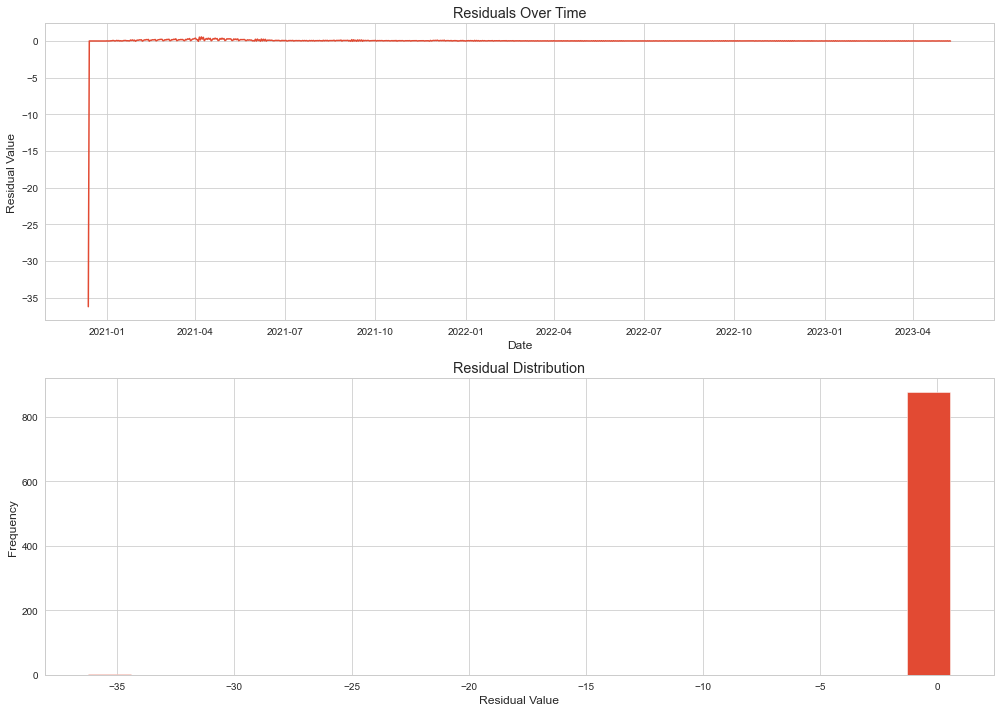

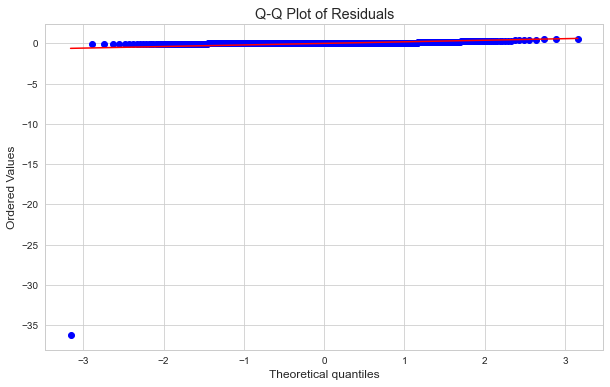


Interpreting the forecast results:

Current vaccination level (2023-05-09): 69.47%
Forecasted vaccination level after 3 months (2023-08-07): 69.43%
Projected increase: -0.04 percentage points (-0.06% relative change)
Not projected to reach 70% fully vaccinated within the forecast period
Not projected to reach 80% fully vaccinated within the forecast period
Not projected to reach 90% fully vaccinated within the forecast period



2. Key Findings from the Forecast:
   - United States is projected to reach 69.43% full vaccination in three months
   - The rate of increase is expected to be -0.0005 percentage points per day
   - The confidence intervals widen over time, reflecting increasing uncertainty


In [50]:
# Plot residuals
residuals = model_fit.resid
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
# Residuals over time
ax1.plot(residuals)
ax1.set_title('Residuals Over Time')
ax1.set_xlabel('Date')
ax1.set_ylabel('Residual Value')
ax1.grid(True)
# Residual distribution
ax2.hist(residuals, bins=20)
ax2.set_title('Residual Distribution')
ax2.set_xlabel('Residual Value')
ax2.set_ylabel('Frequency')
ax2.grid(True)
plt.tight_layout()
plt.show()
# Q-Q plot of residuals
plt.figure(figsize=(10, 6))
from scipy import stats
stats.probplot(residuals, plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.grid(True)
plt.show()
print("\nInterpreting the forecast results:")
# Calculate key metrics from forecast
start_value = ts_data.iloc[-1]
end_value = forecast_series.iloc[-1]
increase = end_value - start_value
percent_increase = (increase / start_value) * 100 if start_value > 0 else 0
print(f"\nCurrent vaccination level ({ts_data.index[-1].strftime('%Y-%m-%d')}): {start_value:.2f}%")
print(f"Forecasted vaccination level after 3 months ({forecast_series.index[-1].strftime('%Y-%m-%d')}): {end_value:.2f}%")
print(f"Projected increase: {increase:.2f} percentage points ({percent_increase:.2f}% relative change)")
# Calculate time to reach important thresholds
thresholds = [70, 80, 90]
forecast_df = pd.DataFrame({'forecast': forecast_series})
for threshold in thresholds:
    if start_value < threshold:
        above_threshold = forecast_df[forecast_df['forecast'] >= threshold]
        if not above_threshold.empty:
            threshold_date = above_threshold.index[0]
            days_to_threshold = (threshold_date - ts_data.index[-1]).days
            print(f"Projected to reach {threshold}% fully vaccinated on {threshold_date.strftime('%Y-%m-%d')} ({days_to_threshold} days)")
        else:
            print(f"Not projected to reach {threshold}% fully vaccinated within the forecast period")
# Create interactive dashboard comparing forecasts for multiple countries
forecast_countries = ['United States', 'United Kingdom', 'Germany', 'France']
forecast_results = {}
# Generate forecasts for selected countries
for country in forecast_countries:
    country_data = df[df['location'] == country].copy()
    if len(country_data) > 30:  # Ensure enough data
        country_data.set_index('date', inplace=True)
        country_data.sort_index(inplace=True) 
        # Get time series and handle missing values
        ts = country_data['people_fully_vaccinated_per_hundred'].fillna(method='ffill').dropna() 
        if len(ts) > 30: 
            # Fit ARIMA model 
            model = ARIMA(ts, order=(1, 1, 1))
            model_fit = model.fit()
            # Generate forecast
            forecast = model_fit.forecast(steps=forecast_horizon)
            forecast_index = pd.date_range(start=ts.index[-1] + pd.Timedelta(days=1), 
                                         periods=forecast_horizon, freq='D')
            # Store results
            forecast_results[country] = {
                'historical': ts,
                'forecast': pd.Series(forecast, index=forecast_index)
            }
# Create comparison dashboard
if forecast_results:
    fig = go.Figure()
    # Add historical and forecast lines for each country
    colors = ['blue', 'red', 'green', 'purple', 'orange']
    for i, (country, data) in enumerate(forecast_results.items()):
        color = colors[i % len(colors)]
        # Historical data
        fig.add_trace(go.Scatter(
            x=data['historical'].index, 
            y=data['historical'].values,
            mode='lines',
            name=f'{country} - Historical',
            line=dict(color=color)
        ))
        # Forecast
        fig.add_trace(go.Scatter(
            x=data['forecast'].index,
            y=data['forecast'].values,
            mode='lines',
            name=f'{country} - Forecast',
            line=dict(color=color, dash='dash')
        ))
    fig.update_layout(
        title='3-Month Vaccination Forecast Comparison',
        xaxis_title='Date',
        yaxis_title='Percentage of Population Fully Vaccinated',
        legend_title='Country and Data Type',
        height=600
    )
    fig.show()
print("\n2. Key Findings from the Forecast:")
print(f"   - {target_country} is projected to reach {end_value:.2f}% full vaccination in three months")
print(f"   - The rate of increase is expected to be {increase/90:.4f} percentage points per day")
print("   - The confidence intervals widen over time, reflecting increasing uncertainty")